In [57]:
import matplotlib.pyplot as plt
fig_width = 12
fig_height = 10
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# 1. Variable packet sizes
- packet sizes = [2, ..., 20]
- number of nodes = 20
- distance = 25
- TX ratio = 80%, RX ratio = 80%
- topology: <img src="broadcast/simulations/25_20.png">


	 broadcast
Packet size: 2
	Packets sent by sink: 100
	Packets sent:received by nodes: 1757:1757
	Received packets total: 1757/2000, 87.85%

Packet size: 4
	Packets sent by sink: 100
	Packets sent:received by nodes: 1772:1772
	Received packets total: 1772/2000, 88.60%

Packet size: 6
	Packets sent by sink: 100
	Packets sent:received by nodes: 1775:1775
	Received packets total: 1775/2000, 88.75%

Packet size: 8
	Packets sent by sink: 100
	Packets sent:received by nodes: 1779:1779
	Received packets total: 1779/2000, 88.95%

Packet size: 10
	Packets sent by sink: 100
	Packets sent:received by nodes: 1794:1794
	Received packets total: 1794/2000, 89.70%

Packet size: 12
	Packets sent by sink: 100
	Packets sent:received by nodes: 1768:1768
	Received packets total: 1768/2000, 88.40%

Packet size: 14
	Packets sent by sink: 100
	Packets sent:received by nodes: 1767:1767
	Received packets total: 1767/2000, 88.35%

Packet size: 16
	Packets sent by sink: 100
	Packets sent:received by nodes: 1798:

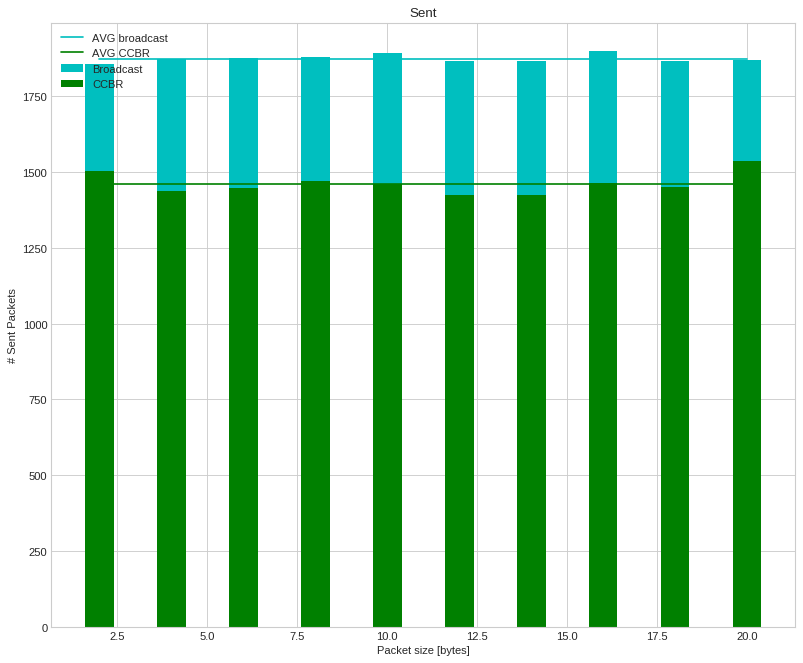

------------ AVG received Broadcast VS CCBR ------------
Received AVG broadcast: 88.72%
Received AVG ccbr: 68.09%

------------ Δ received Broadcast VS CCBR ------------
Δ received 2: 17.65%
Δ received 4: 21.75%
Δ received 6: 21.40%
Δ received 8: 20.35%
Δ received 10: 21.70%
Δ received 12: 22.25%
Δ received 14: 22.15%
Δ received 16: 21.75%
Δ received 18: 20.75%
Δ received 20: 16.60%

Δ received AVG: 20.63%


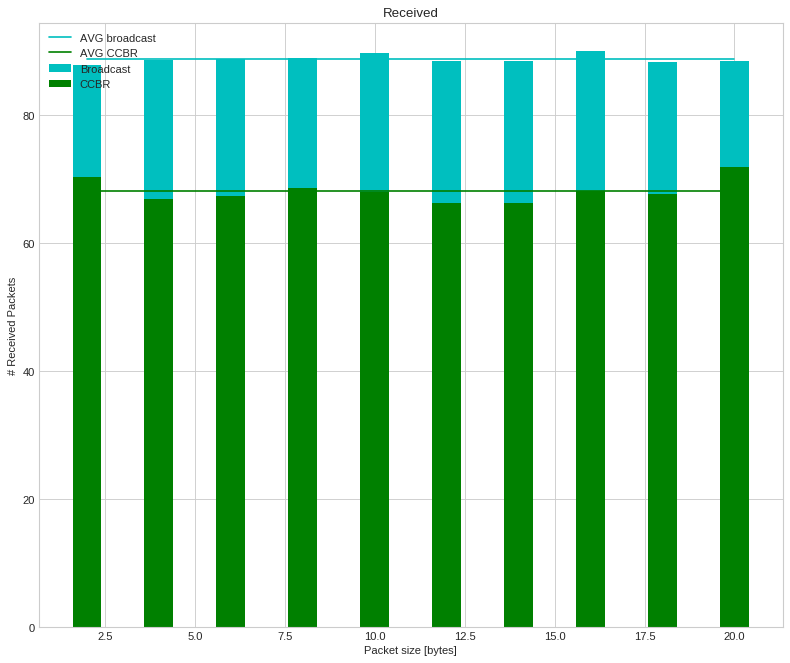

In [58]:
algorithms = ["broadcast", "ccbr"]
packet_sizes = [2,4,6,8,10,12,14,16,18,20]
packets = 100
nodes = 20
distance = 25

sent = {}
received = {}

for algorithm in algorithms:
    print("\n\t", algorithm)
    sent[algorithm] = list()
    received[algorithm] = list()
    
    for packet_size in packet_sizes:
        filename = "results/packet_size/" + algorithm + "_" + str(packet_size) + "_" + str(distance) + "_"  + str(nodes) + ".txt"
        file = open(filename, "r")
        
        received_by_nodes = list()
        sent_by_nodes = list()
        sent_by_sink = list()
        received_by = []

        for i in range(0, nodes+1):
            received_by.append(list())
        for line in file:
            if ('SinkC: Broadcasting packet 101' in line):
                break
            if ('SinkC: Packet sent' in line):
                sent_by_sink.append(line)
            if ('NodeC: Packet sent' in line):
                sent_by_nodes.append(line)
            if ('NodeC: Received the new packet' in line):
                received_by_nodes.append(line)

        print("Packet size: %d" % packet_size)
        print("\tPackets sent by sink: %d" % len(sent_by_sink))
        print("\tPackets sent:received by nodes: %d:%d" % (len(sent_by_nodes),len(received_by_nodes)))
        print("\tReceived packets total: %d/%d, %.2f%%\n" % (len(received_by_nodes), (packets*nodes), (len(received_by_nodes)/(packets*nodes))*100))
        
        sent[algorithm].append(len(sent_by_sink) + len(sent_by_nodes))
        received[algorithm].append(len(received_by_nodes)/(packets*nodes)*100)

        
print("------------ AVG sent Broadcast VS CCBR ------------")    
print("Sent AVG broadcast: %.2f" % (sum(sent["broadcast"])/len(sent["broadcast"])))
print("Sent AVG ccbr: %.2f" % (sum(sent["ccbr"])/len(sent["ccbr"])))

print("\n------------ Δ sent Broadcast VS CCBR ------------")
d_sent = []
for i in range(0, len(sent["broadcast"])):
    d_sent.append(sent["broadcast"][i] - sent["ccbr"][i])
    print("Δ sent %d: %d" % (packet_sizes[i], d_sent[i]))
print("\nΔ sent AVG: %.2f" % (sum(d_sent)/len(d_sent)))

x1 = packet_sizes
y1 = sent["broadcast"]  

x2 = packet_sizes
y2 = sent["ccbr"]

plt.figure(figsize=(fig_width, fig_height), dpi= 80)
plt.bar(x1, y1, color = 'c', align = 'center', label="Broadcast") 
plt.bar(x2, y2, color = 'g', align = 'center', label="CCBR")
plt.plot(x1, [(sum(sent["broadcast"])/len(sent["broadcast"]))]*len(packet_sizes), color = 'c', label='AVG broadcast')
plt.plot(x1, [(sum(sent["ccbr"])/len(sent["ccbr"]))]*len(packet_sizes), color = 'g', label='AVG CCBR')
plt.title('Sent') 
plt.ylabel('# Sent Packets') 
plt.xlabel('Packet size [bytes]')
plt.legend(loc='upper left')
plt.show()


print("------------ AVG received Broadcast VS CCBR ------------")        
print("Received AVG broadcast: %.2f%%" % (sum(received["broadcast"])/len(received["broadcast"])))
print("Received AVG ccbr: %.2f%%" % (sum(received["ccbr"])/len(received["ccbr"])))

print("\n------------ Δ received Broadcast VS CCBR ------------")        
d_received = []
for i in range(0, len(received["broadcast"])):
    d_received.append(received["broadcast"][i] - received["ccbr"][i])
    print("Δ received %d: %.2f%%" % (packet_sizes[i], received["broadcast"][i] - received["ccbr"][i]))
print("\nΔ received AVG: %.2f%%" % (sum(d_received)/len(d_received)))    

x1 = packet_sizes
y1 = received["broadcast"]  

x2 = packet_sizes
y2 = received["ccbr"]

plt.figure(figsize=(fig_width, fig_height), dpi= 80)
plt.bar(x1, y1, color = 'c', align = 'center', label="Broadcast") 
plt.bar(x2, y2, color = 'g', align = 'center', label="CCBR")
plt.plot(x1, [(sum(received["broadcast"])/len(received["broadcast"]))]*len(packet_sizes), color = 'c', label='AVG broadcast')
plt.plot(x1, [(sum(received["ccbr"])/len(received["ccbr"]))]*len(packet_sizes), color = 'g', label='AVG CCBR')
plt.title('Received') 
plt.ylabel('# Received Packets') 
plt.xlabel('Packet size [bytes]')
plt.legend(loc='upper left')
plt.show()


# 2. Variable number of nodes
- number of nodes = [8, ..., 28]
- packet size = 2 bytes
- distance = 30
- TX ratio = 80%, RX ratio = 80%
- topologies:

<table>
    <tr>
        <td><img src="broadcast/simulations/30_8.png"></td>
        <td><img src="broadcast/simulations/30_12.png"></td>
        <td><img src="broadcast/simulations/30_16.png"></td>
        <td><img src="broadcast/simulations/30_20.png"></td>
        <td><img src="broadcast/simulations/30_24.png"></td>
        <td><img src="broadcast/simulations/30_28.png"></td>
    </tr>
    <tr>
        <td style="text-align:left">
            <h1>1</h1>
            8 nodes + 1 sink
        </td>
        <td style="text-align:left">
            <h1>2</h1>
            12 nodes + 1 sink
        </td>
        <td style="text-align:left">
            <h1>3</h1>
            16 nodes + 1 sink
        </td>
        <td style="text-align:left">
            <h1>4</h1>
            20 nodes + 1 sink
        </td>
        <td style="text-align:left">
            <h1>5</h1>
            24 nodes + 1 sink
        </td>
        <td style="text-align:left">
            <h1>6</h1>
            28 nodes + 1 sink
        </td>
    </tr>
</table>


	 broadcast
Packet size: 2
	Packets sent by sink: 100
	Packets sent:received by nodes: 701:701
	Received packets total: 701/800, 87.62%

Packet size: 2
	Packets sent by sink: 100
	Packets sent:received by nodes: 1163:1163
	Received packets total: 1163/1200, 96.92%

Packet size: 2
	Packets sent by sink: 100
	Packets sent:received by nodes: 1446:1446
	Received packets total: 1446/1600, 90.38%

Packet size: 2
	Packets sent by sink: 100
	Packets sent:received by nodes: 1740:1740
	Received packets total: 1740/2000, 87.00%

Packet size: 2
	Packets sent by sink: 100
	Packets sent:received by nodes: 2221:2221
	Received packets total: 2221/2400, 92.54%

Packet size: 2
	Packets sent by sink: 100
	Packets sent:received by nodes: 2794:2794
	Received packets total: 2794/2800, 99.79%


	 ccbr
Packet size: 2
	Packets sent by sink: 100
	Packets sent:received by nodes: 578:578
	Received packets total: 578/800, 72.25%

Packet size: 2
	Packets sent by sink: 100
	Packets sent:received by nodes: 960:960
	

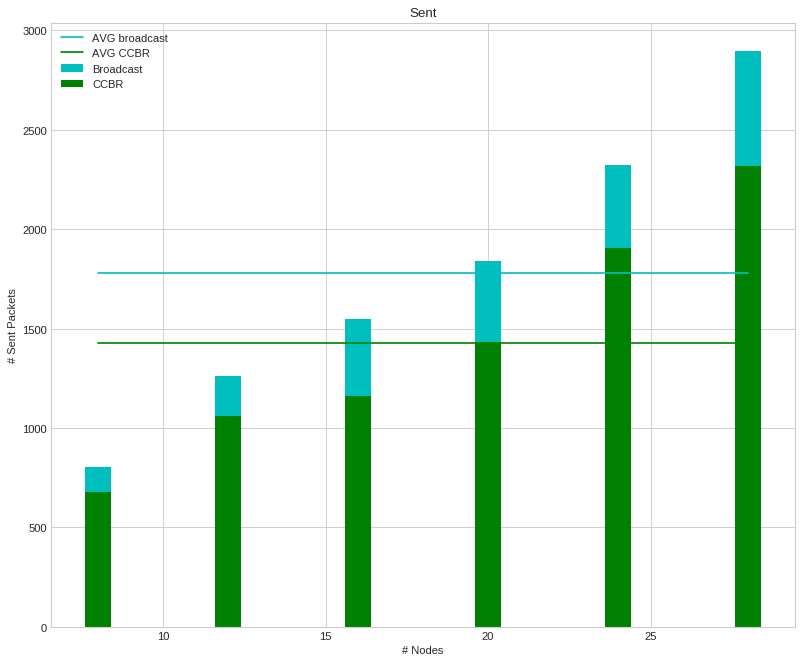

------------ AVG received Broadcast VS CCBR ------------
Received AVG broadcast: 92.37%
Received AVG ccbr: 73.25%

------------ Δ received Broadcast VS CCBR ------------
Δ received 8: 15.38%
Δ received 12: 16.92%
Δ received 16: 24.12%
Δ received 20: 20.50%
Δ received 24: 17.25%
Δ received 28: 20.57%

Δ received AVG: 19.12%


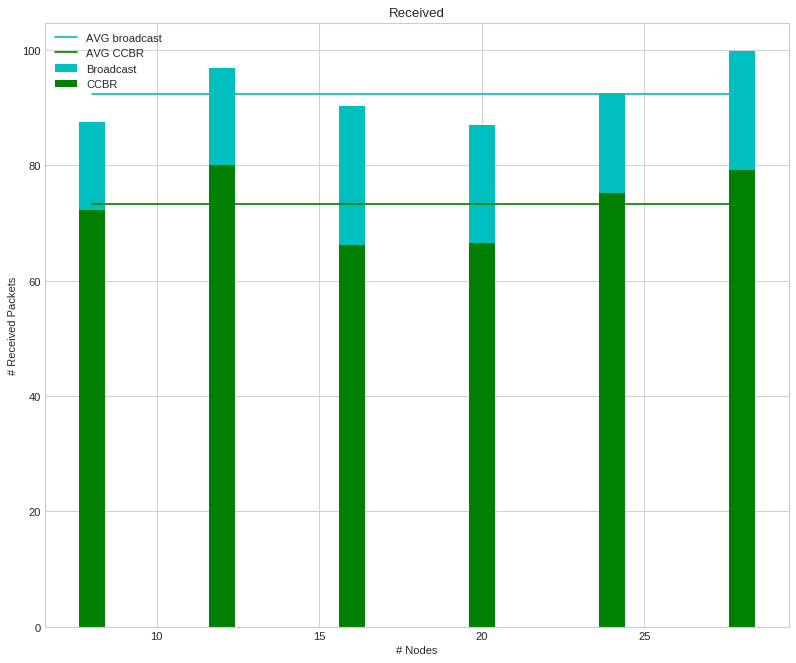

In [59]:
algorithms = ["broadcast", "ccbr"]
packet_size = 2
packets = 100
nodes_number = [8,12,16,20,24,28]
distance = 30

sent = {}
received = {}

for algorithm in algorithms:
    print("\n\t", algorithm)
    sent[algorithm] = list()
    received[algorithm] = list()
    
    for nodes in nodes_number:
        filename = "results/nodes/" + algorithm + "_" + str(packet_size) + "_" + str(distance) + "_"  + str(nodes) + ".txt"
        file = open(filename, "r")
        
        received_by_nodes = list()
        sent_by_nodes = list()
        sent_by_sink = list()
        received_by = []

        for i in range(0, nodes+1):
            received_by.append(list())
        for line in file:
            if ('SinkC: Broadcasting packet 101' in line):
                break
            if ('SinkC: Packet sent' in line):
                sent_by_sink.append(line)
            if ('NodeC: Packet sent' in line):
                sent_by_nodes.append(line)
            if ('NodeC: Received the new packet' in line):
                received_by_nodes.append(line)

        print("Packet size: %d" % packet_size)
        print("\tPackets sent by sink: %d" % len(sent_by_sink))
        print("\tPackets sent:received by nodes: %d:%d" % (len(sent_by_nodes),len(received_by_nodes)))
        print("\tReceived packets total: %d/%d, %.2f%%\n" % (len(received_by_nodes), (packets*nodes), (len(received_by_nodes)/(packets*nodes))*100))
        
        sent[algorithm].append(len(sent_by_sink) + len(sent_by_nodes))
        received[algorithm].append(len(received_by_nodes)/(packets*nodes)*100)

print("------------ AVG sent Broadcast VS CCBR ------------")    
print("Sent AVG broadcast: %.2f" % (sum(sent["broadcast"])/len(sent["broadcast"])))
print("Sent AVG ccbr: %.2f" % (sum(sent["ccbr"])/len(sent["ccbr"])))

print("\n------------ Δ sent Broadcast VS CCBR ------------")
d_sent = []
for i in range(0, len(sent["broadcast"])):
    d_sent.append(sent["broadcast"][i] - sent["ccbr"][i])
    print("Δ sent %d: %d" % (nodes_number[i], d_sent[i]))
print("\nΔ sent AVG: %.2f" % (sum(d_sent)/len(d_sent)))

x1 = nodes_number
y1 = sent["broadcast"]  

x2 = nodes_number
y2 = sent["ccbr"]

plt.figure(figsize=(fig_width, fig_height), dpi= 80)
plt.bar(x1, y1, color = 'c', align = 'center', label="Broadcast") 
plt.bar(x2, y2, color = 'g', align = 'center', label="CCBR")
plt.plot(x1, [(sum(sent["broadcast"])/len(sent["broadcast"]))]*len(nodes_number), color = 'c', label='AVG broadcast')
plt.plot(x1, [(sum(sent["ccbr"])/len(sent["ccbr"]))]*len(nodes_number), color = 'g', label='AVG CCBR')
plt.title('Sent') 
plt.ylabel('# Sent Packets') 
plt.xlabel('# Nodes')
plt.legend(loc='upper left')
plt.show()


print("------------ AVG received Broadcast VS CCBR ------------")        
print("Received AVG broadcast: %.2f%%" % (sum(received["broadcast"])/len(received["broadcast"])))
print("Received AVG ccbr: %.2f%%" % (sum(received["ccbr"])/len(received["ccbr"])))

print("\n------------ Δ received Broadcast VS CCBR ------------")        
d_received = []
for i in range(0, len(received["broadcast"])):
    d_received.append(received["broadcast"][i] - received["ccbr"][i])
    print("Δ received %d: %.2f%%" % (nodes_number[i], received["broadcast"][i] - received["ccbr"][i]))
print("\nΔ received AVG: %.2f%%" % (sum(d_received)/len(d_received)))

x1 = nodes_number
y1 = received["broadcast"]  

x2 = nodes_number
y2 = received["ccbr"]

plt.figure(figsize=(fig_width, fig_height), dpi= 80)
plt.bar(x1, y1, color = 'c', align = 'center', label="Broadcast") 
plt.bar(x2, y2, color = 'g', align = 'center', label="CCBR")
plt.plot(x1, [(sum(received["broadcast"])/len(received["broadcast"]))]*len(nodes_number), color = 'c', label='AVG broadcast')
plt.plot(x1, [(sum(received["ccbr"])/len(received["ccbr"]))]*len(nodes_number), color = 'g', label='AVG CCBR')
plt.title('Received') 
plt.ylabel('# Received Packets') 
plt.xlabel('# Nodes')
plt.legend(loc='upper left')
plt.show()

# 3. Variable distance
- distance = [10, ..., 40]
- packet size = 2 bytes
- number of nodes: 12 nodes + 1 sink
- TX ratio = 80%, RX ratio = 80%
- topologies:

<table>
    <tr>
        <td><img src="broadcast/simulations/10_12.png"></td>
        <td><img src="broadcast/simulations/15_12.png"></td>
        <td><img src="broadcast/simulations/20_12.png"></td>
        <td><img src="broadcast/simulations/25_12.png"></td>
        <td><img src="broadcast/simulations/30_12.png"></td>
        <td><img src="broadcast/simulations/35_12.png"></td>
        <td><img src="broadcast/simulations/40_12.png"></td>
    </tr>
    <tr>
        <td style="text-align:left">
            <h1>1</h1>
            distance = 10
        </td>
        <td style="text-align:left">
            <h1>2</h1>
            distance = 15
        </td>
        <td style="text-align:left">
            <h1>3</h1>
            distance = 20
        </td>
        <td style="text-align:left">
            <h1>4</h1>
            distance = 25
        </td>
        <td style="text-align:left">
            <h1>5</h1>
            distance = 30
        </td>
        <td style="text-align:left">
            <h1>6</h1>
            distance = 35
        </td>
        <td style="text-align:left">
            <h1>7</h1>
            distance = 40
        </td>
    </tr>
</table>


	 broadcast
Distance: 10
	Packets sent by sink: 100
	Packets sent:received by nodes: 1188:1188
	Received packets total: 1188/1200, 99.00%

Distance: 15
	Packets sent by sink: 100
	Packets sent:received by nodes: 1200:1200
	Received packets total: 1200/1200, 100.00%

Distance: 20
	Packets sent by sink: 100
	Packets sent:received by nodes: 1188:1188
	Received packets total: 1188/1200, 99.00%

Distance: 25
	Packets sent by sink: 100
	Packets sent:received by nodes: 1188:1188
	Received packets total: 1188/1200, 99.00%

Distance: 30
	Packets sent by sink: 100
	Packets sent:received by nodes: 1163:1163
	Received packets total: 1163/1200, 96.92%

Distance: 35
	Packets sent by sink: 100
	Packets sent:received by nodes: 677:677
	Received packets total: 677/1200, 56.42%

Distance: 40
	Packets sent by sink: 100
	Packets sent:received by nodes: 660:660
	Received packets total: 660/1200, 55.00%


	 ccbr
Distance: 10
	Packets sent by sink: 100
	Packets sent:received by nodes: 876:876
	Received pack

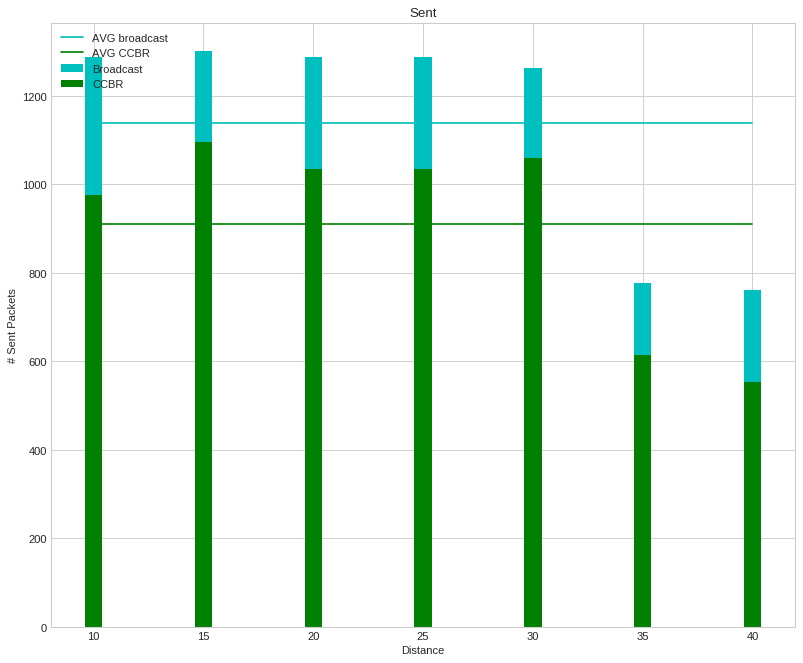

------------ AVG received Broadcast VS CCBR ------------
Received AVG broadcast: 86.48%
Received AVG ccbr: 67.49%

------------ Δ received Broadcast VS CCBR ------------
Δ received 10: 26.00%
Δ received 15: 17.00%
Δ received 20: 21.08%
Δ received 25: 21.08%
Δ received 30: 16.92%
Δ received 35: 13.50%
Δ received 40: 17.33%

Δ received AVG: 18.99%


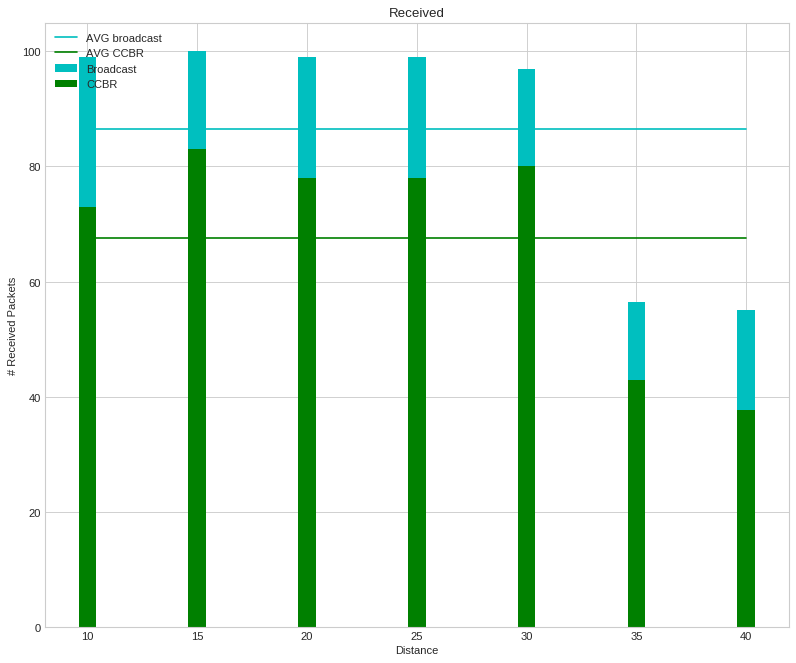

In [60]:
algorithms = ["broadcast", "ccbr"]
packet_size = 2
packets = 100
nodes = 12
distances = [10,15,20,25,30,35,40]

sent = {}
received = {}

for algorithm in algorithms:
    print("\n\t", algorithm)
    sent[algorithm] = list()
    received[algorithm] = list()
    
    for distance in distances:
        filename = "results/distances/" + algorithm + "_" + str(packet_size) + "_" + str(distance) + "_"  + str(nodes) + ".txt"
        file = open(filename, "r")
        
        received_by_nodes = list()
        sent_by_nodes = list()
        sent_by_sink = list()
        received_by = []

        for i in range(0, nodes+1):
            received_by.append(list())
        for line in file:
            if ('SinkC: Broadcasting packet 101' in line):
                break
            if ('SinkC: Packet sent' in line):
                sent_by_sink.append(line)
            if ('NodeC: Packet sent' in line):
                sent_by_nodes.append(line)
            if ('NodeC: Received the new packet' in line):
                received_by_nodes.append(line)

        print("Distance: %d" % distance)
        print("\tPackets sent by sink: %d" % len(sent_by_sink))
        print("\tPackets sent:received by nodes: %d:%d" % (len(sent_by_nodes),len(received_by_nodes)))
        print("\tReceived packets total: %d/%d, %.2f%%\n" % (len(received_by_nodes), (packets*nodes), (len(received_by_nodes)/(packets*nodes))*100))
        
        sent[algorithm].append(len(sent_by_sink) + len(sent_by_nodes))
        received[algorithm].append(len(received_by_nodes)/(packets*nodes)*100)

        
print("------------ AVG sent Broadcast VS CCBR ------------")        
print("Sent AVG broadcast: %.2f" % (sum(sent["broadcast"])/len(sent["broadcast"])))
print("Sent AVG ccbr: %.2f" % (sum(sent["ccbr"])/len(sent["ccbr"])))

print("\n------------ Δ sent Broadcast VS CCBR ------------")
d_sent = []
for i in range(0, len(sent["broadcast"])):
    d_sent.append(sent["broadcast"][i] - sent["ccbr"][i])
    print("Δ sent %d: %d" % (distances[i], d_sent[i]))
print("\nΔ sent AVG: %.2f" % (sum(d_sent)/len(d_sent)))
        
x1 = distances
y1 = sent["broadcast"]  

x2 = distances
y2 = sent["ccbr"]

plt.figure(figsize=(fig_width, fig_height), dpi= 80)
plt.bar(x1, y1, color = 'c', align = 'center', label="Broadcast") 
plt.bar(x2, y2, color = 'g', align = 'center', label="CCBR")
plt.plot(x1, [(sum(sent["broadcast"])/len(sent["broadcast"]))]*len(distances), color = 'c', label='AVG broadcast')
plt.plot(x1, [(sum(sent["ccbr"])/len(sent["ccbr"]))]*len(distances), color = 'g', label='AVG CCBR')
plt.title('Sent') 
plt.ylabel('# Sent Packets') 
plt.xlabel('Distance')
plt.legend(loc='upper left')
plt.show()


print("------------ AVG received Broadcast VS CCBR ------------")        
print("Received AVG broadcast: %.2f%%" % (sum(received["broadcast"])/len(received["broadcast"])))
print("Received AVG ccbr: %.2f%%" % (sum(received["ccbr"])/len(received["ccbr"])))

print("\n------------ Δ received Broadcast VS CCBR ------------")        
d_received = []
for i in range(0, len(received["broadcast"])):
    d_received.append(received["broadcast"][i] - received["ccbr"][i])
    print("Δ received %d: %.2f%%" % (distances[i], received["broadcast"][i] - received["ccbr"][i]))
print("\nΔ received AVG: %.2f%%" % (sum(d_received)/len(d_received)))

x1 = distances
y1 = received["broadcast"]  

x2 = distances
y2 = received["ccbr"]

plt.figure(figsize=(fig_width, fig_height), dpi= 80)
plt.bar(x1, y1, color = 'c', align = 'center', label="Broadcast") 
plt.bar(x2, y2, color = 'g', align = 'center', label="CCBR")
plt.plot(x1, [(sum(received["broadcast"])/len(received["broadcast"]))]*len(distances), color = 'c', label='AVG broadcast')
plt.plot(x1, [(sum(received["ccbr"])/len(received["ccbr"]))]*len(distances), color = 'g', label='AVG CCBR')
plt.title('Received') 
plt.ylabel('# Received Packets') 
plt.xlabel('Distance')
plt.legend(loc='upper left')
plt.show()